# Explore here

In [107]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# load the .env file variables
load_dotenv()


True

In [108]:
# Get credential values
client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

In [109]:
# Spotify API credentials
auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
spotify = spotipy.Spotify(auth_manager=auth_manager)
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id="client_id",client_secret="client_secret"))

Hacemos peticiones API

In [110]:
artist_id = "4q3ewBCX7sLwd24euuV69X"

# Get the top tracks of an artist
top_albunes = spotify.artist_top_tracks(artist_id,'ES')
albunes=top_albunes['tracks']
datos=[]
for i in albunes:
    data={}
    for clave, valor in i.items():
            if clave=="name":
                data['nombre']=valor
            elif clave=="duration_ms":
                data['duracion(min)']=round((valor/1000)/60,2)
            elif clave=="popularity":
                data['popularidad']=valor
            
    datos.append(data)


df=pd.DataFrame(datos)
df_Final=df[['nombre','popularidad','duracion(min)']]
df_Final=df_Final.sort_values(by="popularidad",ascending=False)
df_Final


,nombre,popularidad,duracion(min)
0,DtMF,91,3.95
1,BAILE INoLVIDABLE,90,6.13
2,NUEVAYoL,89,3.06
3,EoO,89,3.41
4,Qué Pasaría...,88,3.18
5,VeLDÁ,87,3.92
6,VOY A LLeVARTE PA PR,87,2.61
7,LA CANCIÓN,86,4.04
8,Diles,85,4.77
9,KLOuFRENS,85,3.32


Analisis relacion estadistica

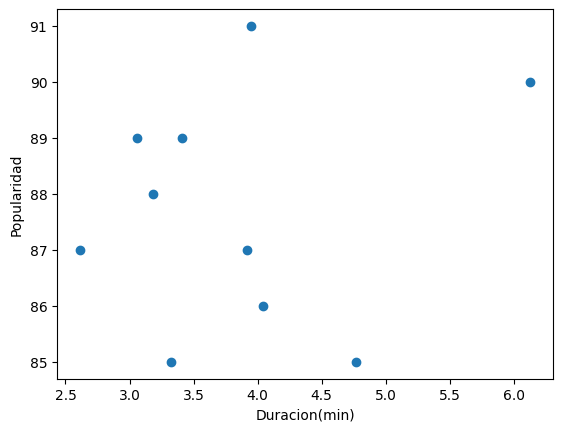

In [111]:
plt.scatter(x=df_Final["duracion(min)"],y=df_Final["popularidad"])
plt.xlabel("Duracion(min)")
plt.ylabel("Popularidad")
plt.show()

In [122]:
correlacion=df_Final["duracion(min)"].corr(df_Final["popularidad"])
print(f"La variable duracion y popularidad tienen una correalcion del {correlacion*100} %")

La variable duracion y popularidad tienen una correalcion del 17.201826596970527 %


viendo el grafico y habiendo obtenido la corralacion entre ambas variables podemos apreciar que la popularidad no depende o no esta correlacionada con la duracion de la cancion para el artista Bad Bunny